##  Inicializando DataFrame e Importando Bibliotecas do Projeto

In [101]:
# IMPORTAÇÕES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import pickle as pkl

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [27]:
# LEITURA DO ARQUIVO desafio_indicium_imdb.csv

df = pd.read_csv("../data/raw/desafio_indicium_imdb.csv")
df.head(10)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
5,6,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
6,7,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
7,8,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
8,9,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"
9,10,The Lord of the Rings: The Fellowship of the Ring,2001,U,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,"315,544,750"


## Análise Exploratória dos Dados

In [28]:
# INFORMAÇÕES SOBRE O DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


##### Buscando valores Nulos

In [ ]:
# ENCONTRANDO NULOS

df.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

### Buscando duplicatas

In [30]:
# VERIFICANDO OCORRENCIA DE DADOS DUPLICADOS

df.duplicated().sum()

np.int64(0)

## AJUSTANDO DADOS INCONSISTENTES

#### Removendo valores nulos para não comprometer a manipulação dos dados

In [31]:
df = df.dropna() # .dropna() PARA REMOVER NULOS
df.isnull().sum()

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

#### Removendo coluna ID para melhor visualização dos dados

In [32]:
df.drop(columns="Unnamed: 0", inplace=True)
df.head(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


#### AJUSTANDO COLUNA "RUNTIME" PARA EXPRESSAR OS DADOS EM INTEIRO, POR MINUTO

In [33]:
df["Runtime /min"] = df["Runtime"].str.replace(" min", "").astype("int64") # CONVERTENDO A COLUNA PARA O TIPO "int64", RENOMEANDO A COLUNA E REMOVENDO SUFIXO " min" DOS VALORES
df.drop(columns=["Runtime"], inplace=True)
df.head(5)

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime /min
0,The Godfather,1972,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",175
1,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",152
2,The Godfather: Part II,1974,A,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",202
3,12 Angry Men,1957,U,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",96
4,The Lord of the Rings: The Return of the King,2003,U,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905",201


#### LISTANDO OS GENEROS DE CADA FILME NA COLUNA "GENRE"

In [34]:
df['Genre'] = df['Genre'].str.split(", ") 
df['Genre'].head(5)

0                [Crime, Drama]
1        [Action, Crime, Drama]
2                [Crime, Drama]
3                [Crime, Drama]
4    [Action, Adventure, Drama]
Name: Genre, dtype: object

#### CORRIJINDO FORMATAÇÃO DOS DADOS EM "Gross" E TIPO DE VALOR PARA "int64"

In [35]:
df.loc[:, 'Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].astype('int64')
df["Gross"]

0      134966411
1      534858444
2       57300000
3        4360000
4      377845905
         ...    
989       696690
990      1378435
991    141843612
993     13780024
996     30500000
Name: Gross, Length: 713, dtype: int64

#### VERIFICANDO OCORRENCIA DE VALORES INCONSISTENTES NAS COLUNAS

In [36]:
(df["Gross"] % 1 != 0).any() # COLUNA "Gross"

np.False_

In [37]:
df['Released_Year'].unique() # COLUNA "Released Year"

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '1981', '1979',
       '1964', '2004', '1992', '1987', '1986', '1984', '1983', '1976',
       '1973', '1971', '1965', '1962', '1959', '1958', '1952', '1944',
       '1941', '2013', '2007', '2005', '1989', '1963', '1950', '1948',
       '2015', '1996', '1982', '1978', '1967', '1951', '1949', '1940',
       '1939', '1934', '1970', '1969', '1961', '1946', '1930', '1938',
       '1933', 'PG', '1953'], dtype=object)

#### TRATANDO VALOR INCONSISTENTE EM "Released Year" E ALTERANDO TIPO DE DADO PARA "int64"

In [38]:
df = df[df["Released_Year"]!="PG"]
df['Released_Year'] = df['Released_Year'].astype('int64')

### Extração de Características com TF-IDF e One-Hot Encoding

#### "Overview": Transformando textos em representações numéricas, destacando as 20 palavras mais relevantes de cada filme

In [39]:
tfidf = TfidfVectorizer(stop_words='english', max_features=20) # Instanciando um TfidfVectorizer
tfidf_overview = tfidf.fit_transform(df['Overview']) # Capturando palavras mais relevantes das Overviews dos filmes

df_tfidf_overview = pd.DataFrame(tfidf_overview.toarray(), columns=tfidf.get_feature_names_out(), index=df.index) # Criando um DataFrame onde: colunas = palavras extraidas; linhas = filmes
df_tfidf_overview.to_excel('../outputs/TfidfOverview.xlsx', index=False) # Transformando DataFrame em um arquivo Excel para armazenamento
df_tfidf_overview

,american,boy,family,father,finds,help,life,love,man,new,old,son,story,war,wife,woman,world,year,years,young
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.504176,0.0,0.0,0.0,0.433782,0.000000,0.0,0.482869,0.0,0.569629,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
990,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
991,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
993,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


#### "Genre": Transformando os gêneros de cada filme em colunas binárias, indicando a presença (1) ou ausência (0) de cada gênero no dataset.

In [40]:
# Aplicando a Binarização
mlb = MultiLabelBinarizer()
df_genre = pd.DataFrame(mlb.fit_transform(df['Genre']), columns=mlb.classes_, index=df.index)

df_genre.to_excel('../outputs/Genre_OneHot.xlsx', index=False) # Transformando DataFrame em um arquivo Excel para armazenamento
df_genre.head(5)

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Análise Exploratória

### Análise Estatística

##### Descrição estatística das colunas quantitativas

In [43]:
quantitativas = ['Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime /min'] # Colunas quantitativas do dataset
descricao_est = df[quantitativas].describe() # Descrição estatística das colunas quantitativas
descricao_est.to_excel('../outputs/DescEstatistica.xlsx', index=True)
descricao_est

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime /min
count,712.000000,712.000000,712.000000,7.120000e+02,7.120000e+02,712.000000
mean,1995.738764,7.935674,77.154494,3.534662e+05,7.845017e+07,123.667135
std,18.611182,0.288928,12.418115,3.464502e+05,1.150686e+08,25.907607
min,1930.000000,7.600000,28.000000,2.522900e+04,1.305000e+03,72.000000
25%,1986.750000,7.700000,69.750000,9.566475e+04,6.143199e+06,104.000000
50%,2001.000000,7.900000,78.000000,2.359815e+05,3.485015e+07,120.000000
75%,2010.000000,8.100000,86.000000,5.065428e+05,1.023606e+08,136.000000
max,2019.000000,9.200000,100.000000,2.303232e+06,9.366622e+08,238.000000


#### Frequências das colunas qualitativas

In [ ]:
# Coluna "Certificate"
freq_certificate = pd.DataFrame({'Frequência': df['Certificate'].value_counts(), 'Percentual': (df['Certificate'].value_counts(normalize=True)*100).map('{:.2f}%'.format)})
freq_certificate.to_excel('../outputs/FreqCertificate.xlsx', index=True)
freq_certificate

,Frequência,Percentual
Certificate,,
U,182,25.56%
A,173,24.30%
UA,142,19.94%
R,131,18.40%
PG-13,38,5.34%
PG,19,2.67%
G,9,1.26%
Passed,9,1.26%
Approved,6,0.84%


In [45]:
# Coluna "Overview"
words_importance = np.array(tfidf_overview.sum(axis=0)).ravel()
freq_overview_words = pd.DataFrame(index=tfidf.get_feature_names_out(), data={'Importância Total': words_importance, 'Importância Relativa': [f'{x*100/sum(words_importance):.2f}%' for x in words_importance]})
freq_overview_words = freq_overview_words.sort_values(by='Importância Total', ascending=False)
freq_overview_words.to_excel('../outputs/FreqOverview.xlsx', index=True)
freq_overview_words

,Importância Total,Importância Relativa
life,58.333970,9.37%
young,52.272178,8.40%
man,50.871337,8.17%
world,42.605936,6.85%
new,38.866842,6.25%
story,35.389963,5.69%
family,34.756117,5.58%
war,29.683359,4.77%
woman,29.095169,4.68%
help,26.815199,4.31%


In [46]:
# Coluna "Genre"
df_genre_exp = df['Genre'].explode()
freq_genres = pd.DataFrame({'Frequência': df_genre_exp.value_counts(), 'Percentual': (df_genre_exp.explode().value_counts()*100/712).map('{:.2f}%'.format)})
freq_genres.to_excel('../outputs/FreqGenre.xlsx', index=True)
freq_genres

,Frequência,Percentual
Genre,,
Drama,498,69.94%
Adventure,162,22.75%
Comedy,161,22.61%
Crime,142,19.94%
Action,140,19.66%
Thriller,99,13.90%
Biography,88,12.36%
Romance,88,12.36%
Mystery,70,9.83%


In [47]:
# Coluna "Director"
freq_director = pd.DataFrame({'Frequência': df['Director'].value_counts(), 'Percentual': (df['Director'].value_counts(normalize=True)*100).map('{:.2f}%'.format)})
freq_director.to_excel('../outputs/FreqDirector.xlsx', index=True)
freq_director.iloc[:10]

,Frequência,Percentual
Director,,
Steven Spielberg,13,1.83%
Martin Scorsese,10,1.40%
Alfred Hitchcock,9,1.26%
David Fincher,8,1.12%
Clint Eastwood,8,1.12%
Christopher Nolan,8,1.12%
Quentin Tarantino,8,1.12%
Woody Allen,7,0.98%
Rob Reiner,7,0.98%


In [50]:
# Colunas "Star1", "Star2", "Star3", "Star4"
df_stars = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']], axis=0).reset_index(drop=True) # Unindo os atores e atrizes em um único dataframe
freq_stars = pd.DataFrame({'Frequência': df_stars.value_counts(), 'Percentual': (df_stars.value_counts(normalize=True)*100).map('{:.2f}%'.format)})
freq_stars.iloc[:10].to_excel('../outputs/FreqStars.xlsx', index=True)
freq_stars.iloc[:10]

,Frequência,Percentual
Robert De Niro,16,0.56%
Al Pacino,13,0.46%
Tom Hanks,13,0.46%
Brad Pitt,12,0.42%
Christian Bale,11,0.39%
Clint Eastwood,11,0.39%
Matt Damon,11,0.39%
Leonardo DiCaprio,11,0.39%
Ethan Hawke,9,0.32%
Johnny Depp,9,0.32%


##### Recomendando filme popular com base nas medições

In [51]:
filme_popular = df[(df['No_of_Votes']>df['No_of_Votes'].quantile(0.75)) & (df['Meta_score']>df['Meta_score'].quantile(0.75)) & (df['IMDB_Rating'] > df['IMDB_Rating'].quantile(0.75))].sort_values(by='Gross', ascending=False).iloc[:10]
filme_popular.to_excel('../outputs/FilmesPopulares.xlsx', index=False)
filme_popular

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime /min
42,The Lion King,1994,U,"[Animation, Adventure, Drama]",8.5,Lion prince Simba and his father are targeted ...,88.0,Roger Allers,Rob Minkoff,Matthew Broderick,Jeremy Irons,James Earl Jones,942045,422783777,88
150,Toy Story 3,2010,U,"[Animation, Adventure, Comedy]",8.2,The toys are mistakenly delivered to a day-car...,92.0,Lee Unkrich,Tom Hanks,Tim Allen,Joan Cusack,Ned Beatty,757032,415004880,103
4,The Lord of the Rings: The Return of the King,2003,U,"[Action, Adventure, Drama]",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905,201
12,The Lord of the Rings: The Two Towers,2002,UA,"[Action, Adventure, Drama]",8.7,While Frodo and Sam edge closer to Mordor with...,87.0,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1485555,342551365,179
28,Star Wars,1977,UA,"[Action, Adventure, Fantasy]",8.6,Luke Skywalker joins forces with a Jedi Knight...,90.0,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness,1231473,322740140,121
9,The Lord of the Rings: The Fellowship of the Ring,2001,U,"[Action, Adventure, Drama]",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544750,178
145,Up,2009,U,"[Animation, Adventure, Comedy]",8.2,78-year-old Carl Fredricksen travels to Paradi...,88.0,Pete Docter,Bob Peterson,Edward Asner,Jordan Nagai,John Ratzenberger,935507,293004164,96
65,WALL·E,2008,U,"[Animation, Adventure, Family]",8.4,"In the distant future, a small waste-collectin...",95.0,Andrew Stanton,Ben Burtt,Elissa Knight,Jeff Garlin,Fred Willard,999790,223808164,98
23,Saving Private Ryan,1998,R,"[Drama, War]",8.6,"Following the Normandy Landings, a group of U....",91.0,Steven Spielberg,Tom Hanks,Matt Damon,Tom Sizemore,Edward Burns,1235804,216540909,169
46,Back to the Future,1985,U,"[Adventure, Comedy, Sci-Fi]",8.5,"Marty McFly, a 17-year-old high school student...",87.0,Robert Zemeckis,Michael J. Fox,Christopher Lloyd,Lea Thompson,Crispin Glover,1058081,210609762,116


### Gráficos

#### Gráficos de Barra

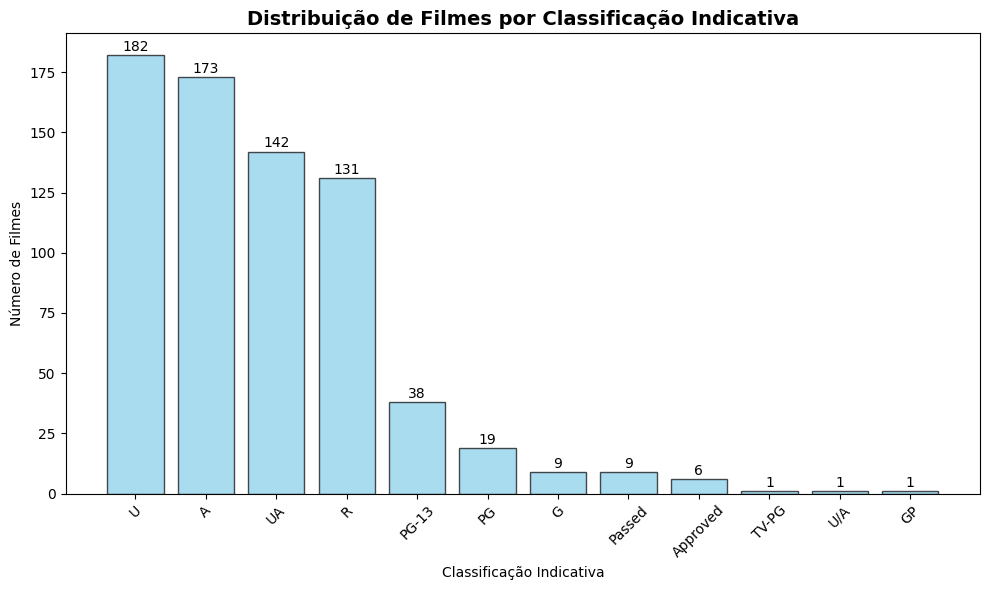

In [ ]:
# Gráfico de barras "Certificate"
certificate_counts = df['Certificate'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(certificate_counts.index, certificate_counts.values, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Classificação Indicativa')
plt.ylabel('Número de Filmes')
plt.title('Distribuição de Filmes por Classificação Indicativa')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../outputs/DistribuicaoDeFilmesPorClassificacao.png', dpi=300, bbox_inches='tight')
plt.show()

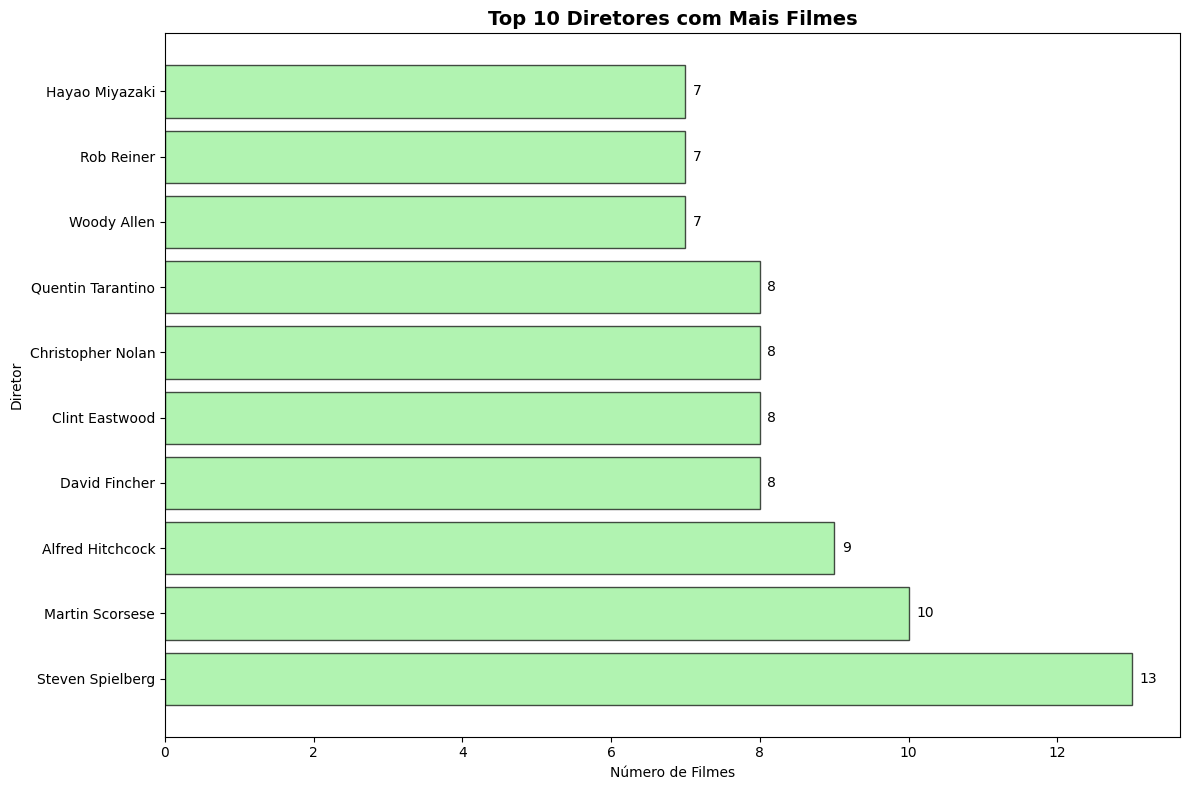

In [ ]:
# Gráfico de barras "Top 10 Diretores"
director_counts = df['Director'].value_counts().head(10)

plt.figure(figsize=(12, 8))
bars = plt.barh(director_counts.index, director_counts.values, color='lightgreen', edgecolor='black', alpha=0.7)

plt.xlabel('Número de Filmes')
plt.ylabel('Diretor')
plt.title('Top 10 Diretores com Mais Filmes')

for i, (director, count) in enumerate(director_counts.items()):
    plt.text(count + 0.1, i, f'{count}', ha='left', va='center')

plt.tight_layout()
plt.savefig('../outputs/Top10Diretores.png', dpi=300, bbox_inches='tight')
plt.show()

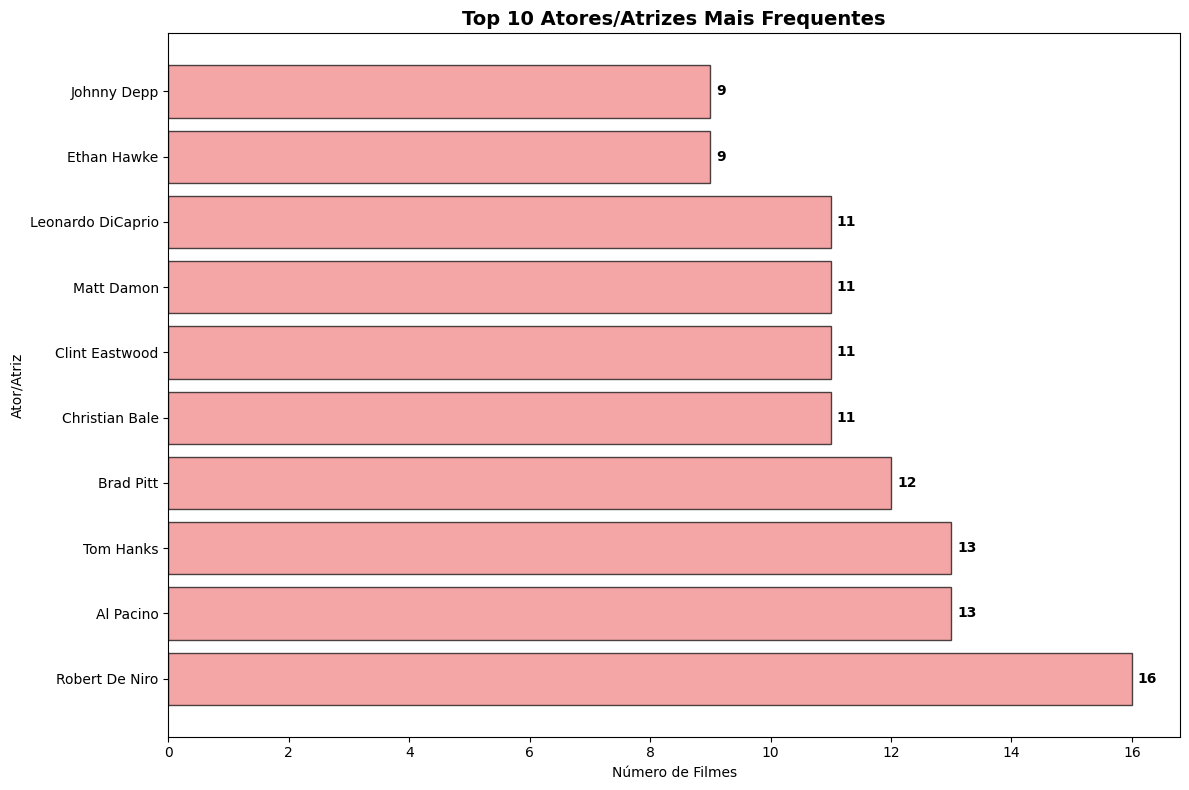

In [61]:
# Gráfico de barras "Top 10 Atores"
plt.figure(figsize=(12, 8))

top_10_actors = freq_stars.head(10) # Os top 10 atores

bars = plt.barh(top_10_actors.index.get_level_values(0), top_10_actors['Frequência'], color='lightcoral', edgecolor='black', alpha=0.7)

plt.xlabel('Número de Filmes')
plt.ylabel('Ator/Atriz')
plt.title('Top 10 Atores/Atrizes Mais Frequentes')

for i, (actor, row) in enumerate(top_10_actors.iterrows()):
    count = row['Frequência']
    plt.text(count + 0.1, i, f'{count}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/Top10Atores.png', dpi=300, bbox_inches='tight')
plt.show()

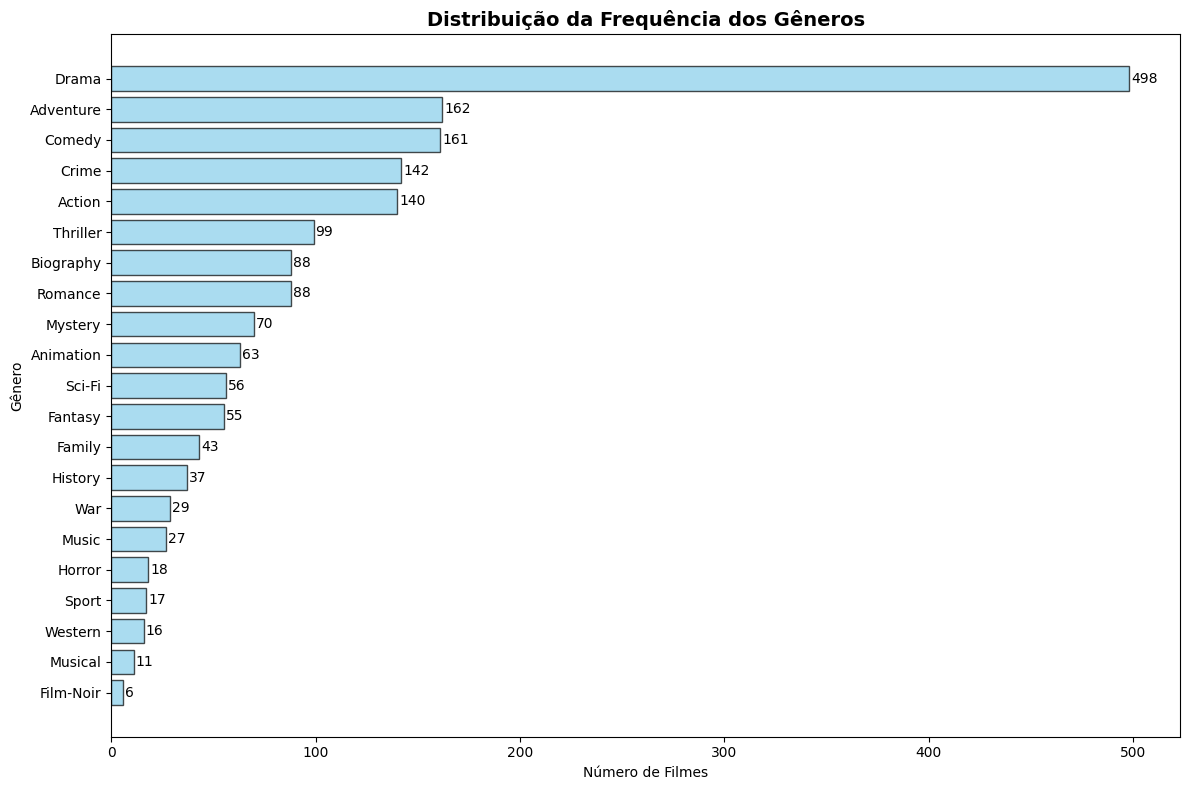

In [65]:
# Gráfico de barras "Frequência dos Gêneros"
plt.figure(figsize=(12, 8))

bars = plt.barh(freq_genres.index, freq_genres['Frequência'], 
                color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.title('Distribuição da Frequência dos Gêneros')
plt.gca().invert_yaxis()  # O mais frequente no topo

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.savefig('../outputs/FreqGeneros.png', dpi=300, bbox_inches='tight')
plt.show()

#### Histogramas

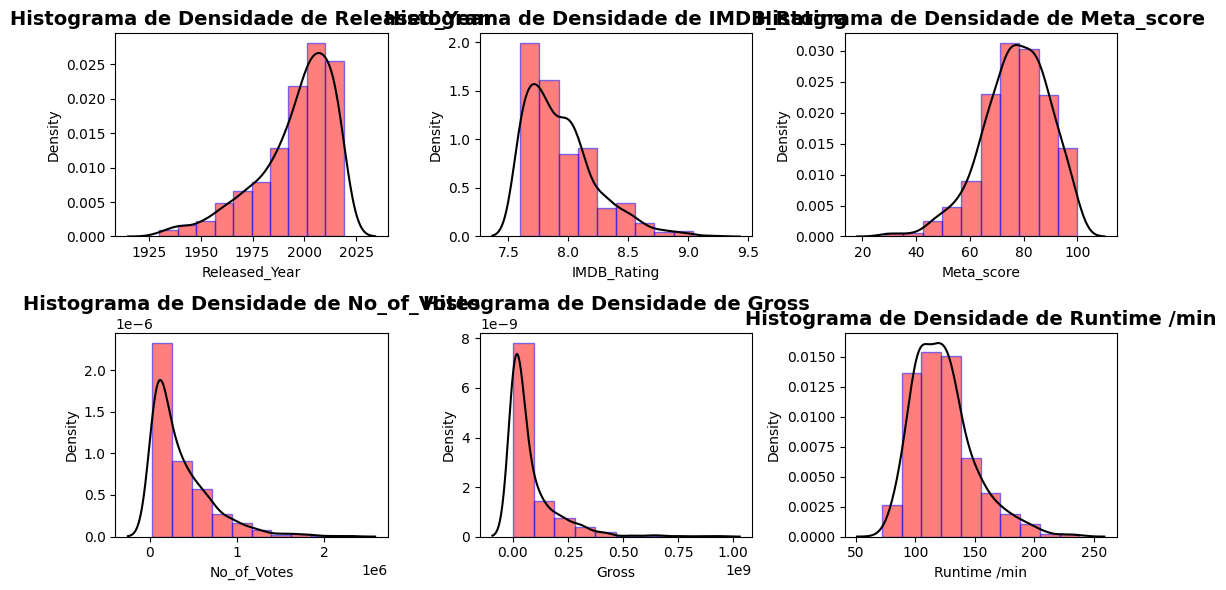

In [72]:
plt.figure(figsize=(11,6))
for column in quantitativas:
    n = quantitativas.index(column)+1
    plt.subplot(2,3,n)
    plt.hist(data = df, x = column, color='red', histtype='bar', rwidth=2, edgecolor='blue', density=True, alpha=.5)
    sns.kdeplot(df[column], color='black')
    plt.title(f'Histograma de Densidade de {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.savefig('../outputs/Histogramas.png')
plt.show()

#### Gráficos de Dispersão

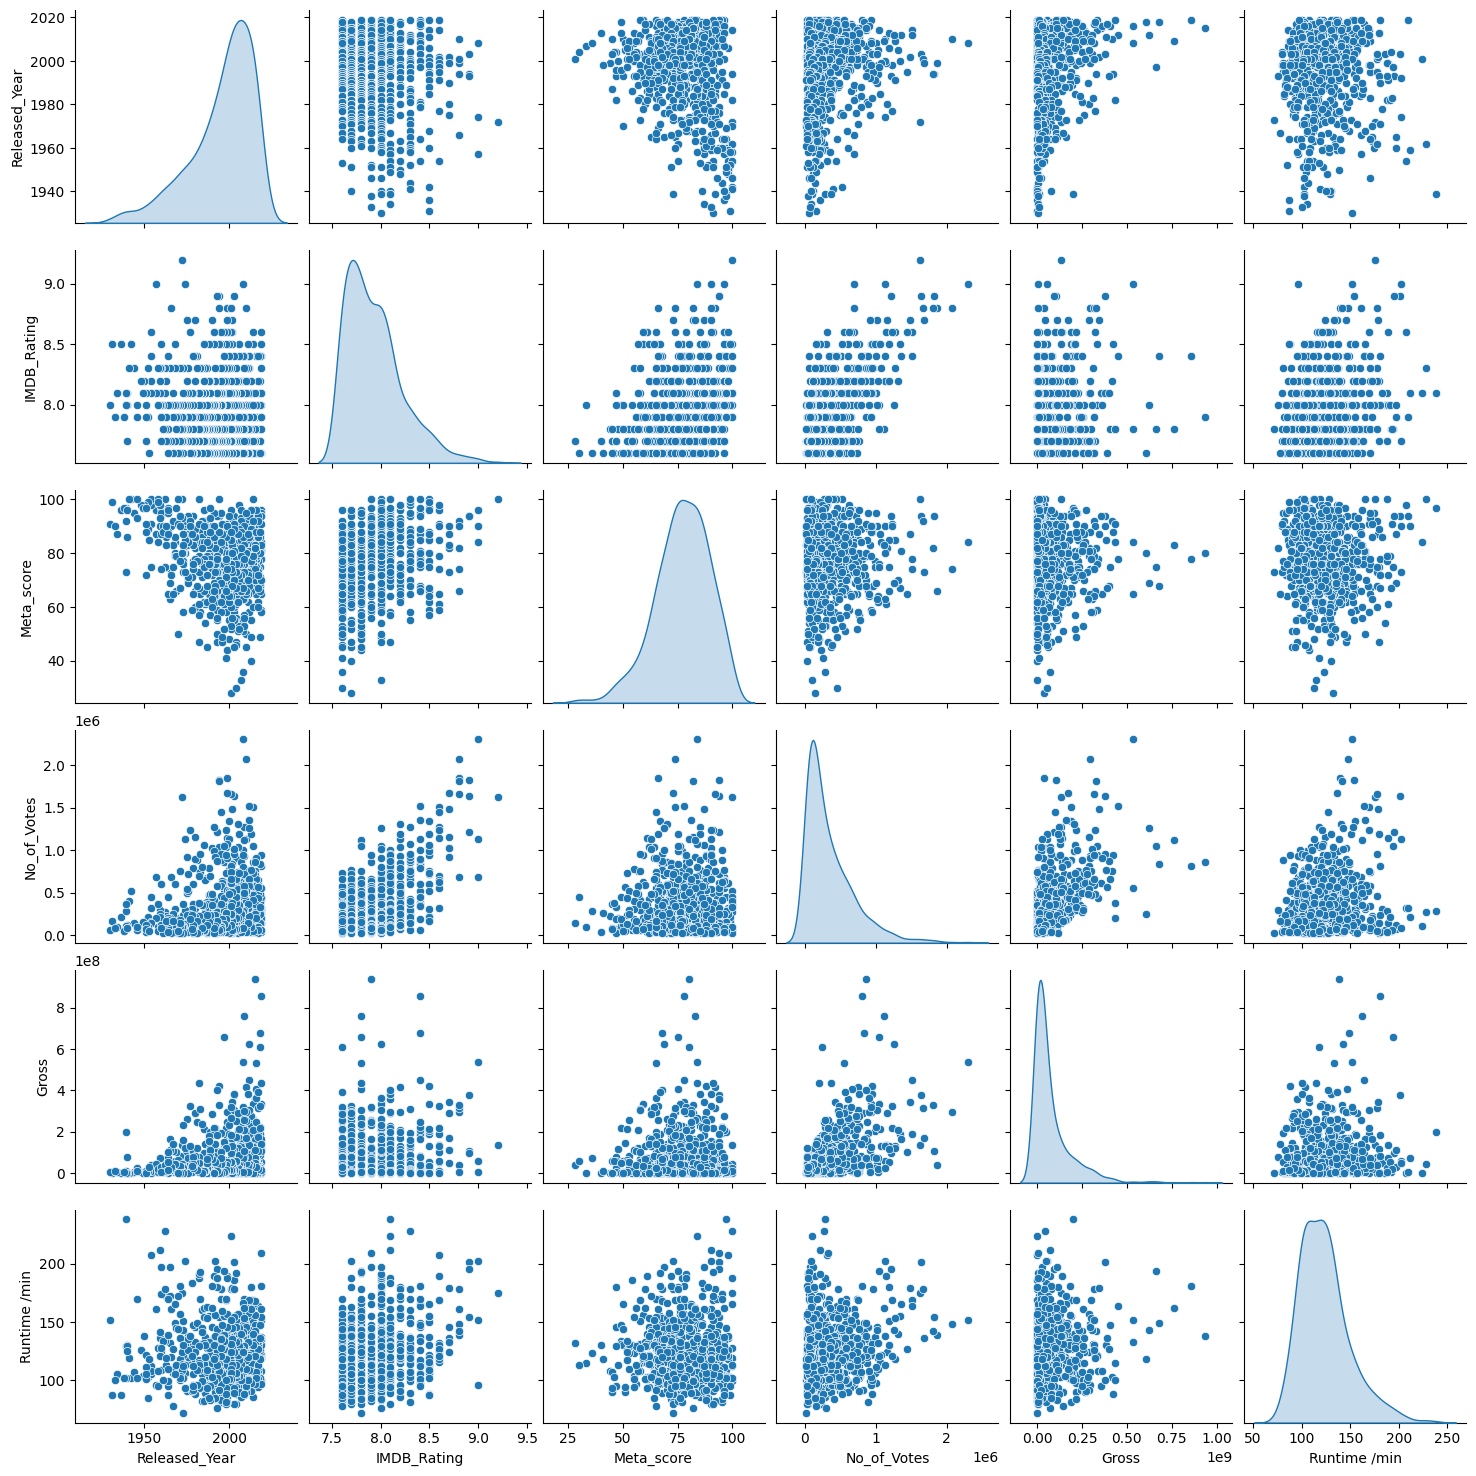

In [73]:
sns.pairplot(df[quantitativas], kind='scatter', diag_kind='kde')
plt.savefig('../outputs/Scatter.png')
plt.show()

##### Comparação entre os gêneros e as palavras extraidas pelo TF-IDF

In [75]:
df_overview_genre = pd.merge(df_tfidf_overview, df_genre_exp, left_index=True, right_index=True)
media_overview_genre = df_overview_genre.groupby('Genre').mean() # Apresentando a média das importâncias de cada palavra para cada gênero
media_overview_genre.to_excel('../outputs/MediaOverviewGenre.xlsx', index=True) 
media_overview_genre

,american,boy,family,father,finds,help,life,love,man,new,old,son,story,war,wife,woman,world,year,years,young
Genre,,,,,,,,,,,,,,,,,,,,
Action,0.033204,0.019522,0.044783,0.032238,0.023134,0.056195,0.046186,0.007143,0.057709,0.053582,0.028871,0.016155,0.018464,0.059668,0.017333,0.014974,0.071418,0.020496,0.025163,0.061100
Adventure,0.025411,0.057828,0.049634,0.038142,0.015082,0.057941,0.038828,0.012307,0.051195,0.063363,0.047418,0.014467,0.030041,0.047227,0.005673,0.012639,0.105005,0.023239,0.023517,0.079989
Animation,0.000000,0.083456,0.060137,0.038437,0.031515,0.015873,0.042013,0.044074,0.048288,0.054898,0.065850,0.015873,0.009968,0.019652,0.014589,0.016788,0.078257,0.046248,0.000000,0.145342
Biography,0.093372,0.009797,0.017222,0.023565,0.008987,0.023021,0.159981,0.011364,0.075746,0.052371,0.022430,0.022256,0.225058,0.059107,0.017528,0.021607,0.063512,0.025121,0.041902,0.013970
Comedy,0.018634,0.038405,0.057377,0.018215,0.042045,0.034018,0.074636,0.056569,0.059829,0.071308,0.032419,0.026534,0.015288,0.006211,0.027333,0.028755,0.040980,0.024326,0.026193,0.082144
Crime,0.025265,0.016588,0.063231,0.027117,0.044431,0.030251,0.044718,0.018375,0.066900,0.043739,0.011914,0.039020,0.053834,0.014085,0.039031,0.017155,0.018051,0.013895,0.032174,0.061564
Drama,0.031237,0.028772,0.050078,0.036873,0.032446,0.033610,0.094693,0.039607,0.079384,0.051633,0.027216,0.034022,0.065750,0.053442,0.036856,0.048127,0.060656,0.029566,0.035191,0.075299
Family,0.000000,0.117365,0.121997,0.067402,0.035571,0.069611,0.009190,0.071297,0.016803,0.060024,0.087404,0.014102,0.063203,0.000000,0.000000,0.061838,0.070852,0.074447,0.000000,0.162156
Fantasy,0.009157,0.062323,0.040896,0.051705,0.060661,0.047386,0.031449,0.099036,0.109839,0.020678,0.000000,0.011423,0.040743,0.000000,0.000000,0.023540,0.149902,0.014463,0.000000,0.104721


##### Heatmap sobre o dataframe acima

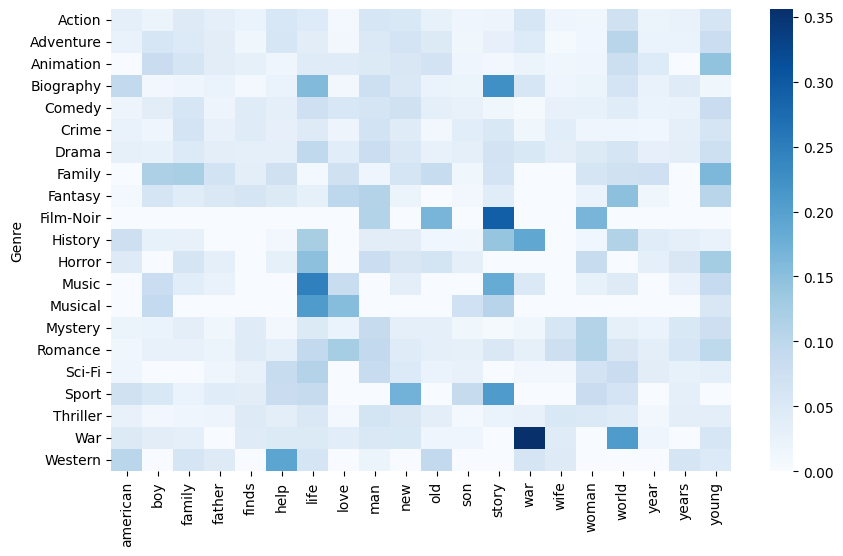

In [80]:
# Apresentação da importância média de cada palavra em função dos gêneros em um heatmap
plt.figure(figsize=(10,6))
sns.heatmap(media_overview_genre, cmap='Blues')
plt.savefig('../outputs/HeatmapPalavrasGenero.png')
plt.show()

#### Boxplots

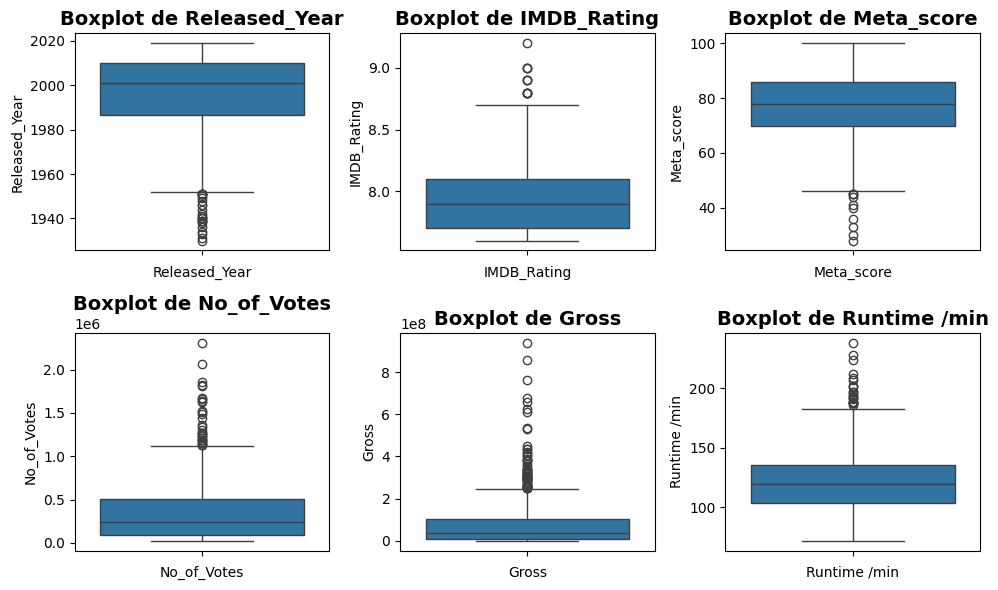

In [78]:
# Gráficos de Boxplot
# Vizualização da distribuição dos percentis e outliers de cada atributo quantitativo
plt.figure(figsize=(10,6))
for column in quantitativas:
    n = quantitativas.index(column)+1
    plt.subplot(2,3,n)
    sns.boxplot(df[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.savefig('../outputs/Boxplots.png')
plt.show()

### Inferência Estatística

In [83]:
# Testando normalidade dos dados

normalidade = pg.normality(df, method='normaltest').round(3) # Para verificar se os atributos quantitativos seguem uma distribuição normal
normalidade.to_excel('../outputs/TesteNormalidade.xlsx', index=True)
normalidade

,W,pval,normal
Released_Year,119.191,0.0,False
IMDB_Rating,122.521,0.0,False
Meta_score,40.898,0.0,False
No_of_Votes,268.552,0.0,False
Gross,475.325,0.0,False
Runtime /min,111.221,0.0,False


In [ ]:
# Verificação da curtose dos atributos, que indica a existência ou não de picos ou achatamentos na distribuição
df_curt_obliq = pd.DataFrame({'Obliquidade': df[quantitativas].skew(), 'Curtose': df[quantitativas].kurtosis() }, index = quantitativas)
df_curt_obliq.to_excel('../outputs/ObliquidadeCurtose.xlsx', index=True)
df_curt_obliq

,Obliquidade,Curtose
Released_Year,-1.146066,0.926881
IMDB_Rating,1.116874,1.270137
Meta_score,-0.584247,0.483403
No_of_Votes,1.820960,4.228842
Gross,2.927656,12.223772
Runtime /min,1.014108,1.375267


#### QQ-Plot

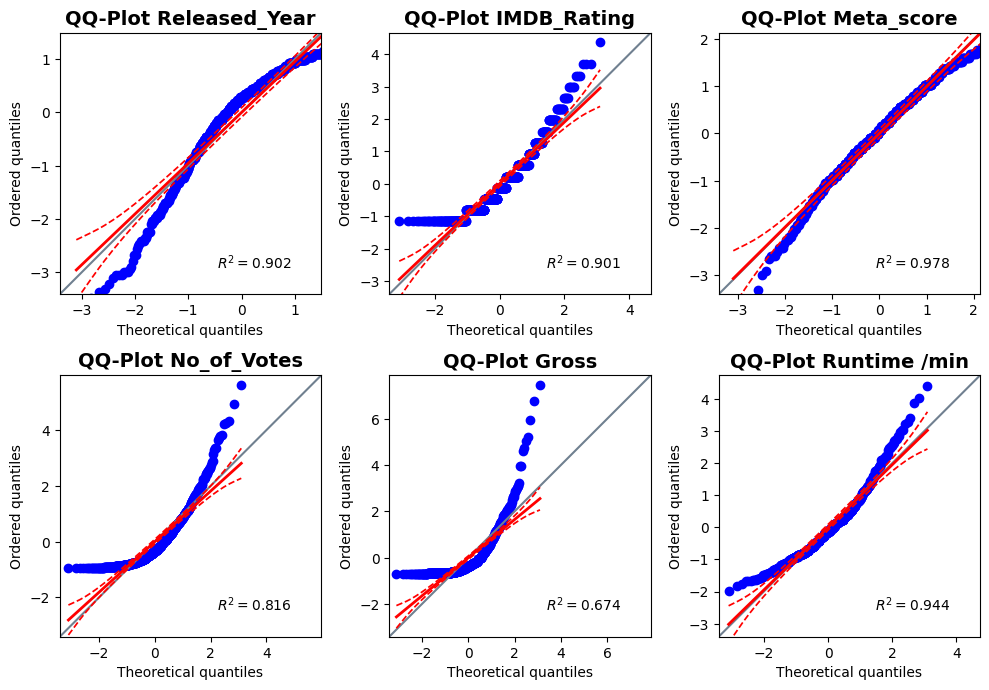

In [85]:
plt.figure(figsize = (10,7))
n = 0
for column in quantitativas:
    n += 1
    plt.subplot(2,3,n)
    pg.qqplot(df[column], dist='norm')
    plt.title(f'QQ-Plot {column}')
plt.tight_layout()
plt.savefig('../outputs/QQPlot.png')
plt.show()

#### Testes de Correlação

In [86]:
kendall = pg.pairwise_corr(df, method='kendall').round(3) # Teste de correlação de Kendall
kendall

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Released_Year,IMDB_Rating,kendall,two-sided,712,-0.106,"[-0.18, -0.03]",0.000,0.811
1,Released_Year,Meta_score,kendall,two-sided,712,-0.118,"[-0.19, -0.04]",0.000,0.883
2,Released_Year,No_of_Votes,kendall,two-sided,712,0.155,"[0.08, 0.23]",0.000,0.987
3,Released_Year,Gross,kendall,two-sided,712,0.125,"[0.05, 0.2]",0.000,0.915
4,Released_Year,Runtime /min,kendall,two-sided,712,0.034,"[-0.04, 0.11]",0.179,0.149
5,IMDB_Rating,Meta_score,kendall,two-sided,712,0.211,"[0.14, 0.28]",0.000,1.000
6,IMDB_Rating,No_of_Votes,kendall,two-sided,712,0.287,"[0.22, 0.35]",0.000,1.000
7,IMDB_Rating,Gross,kendall,two-sided,712,0.020,"[-0.05, 0.09]",0.441,0.084
8,IMDB_Rating,Runtime /min,kendall,two-sided,712,0.152,"[0.08, 0.22]",0.000,0.983
9,Meta_score,No_of_Votes,kendall,two-sided,712,-0.009,"[-0.08, 0.06]",0.730,0.056


In [87]:
spearman = pg.pairwise_corr(df, method='spearman').round(3) # Teste de correlação de Spearman
spearman

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,Released_Year,IMDB_Rating,spearman,two-sided,712,-0.151,"[-0.22, -0.08]",0.000,0.982
1,Released_Year,Meta_score,spearman,two-sided,712,-0.173,"[-0.24, -0.1]",0.000,0.996
2,Released_Year,No_of_Votes,spearman,two-sided,712,0.233,"[0.16, 0.3]",0.000,1.000
3,Released_Year,Gross,spearman,two-sided,712,0.180,"[0.11, 0.25]",0.000,0.998
4,Released_Year,Runtime /min,spearman,two-sided,712,0.049,"[-0.02, 0.12]",0.189,0.259
5,IMDB_Rating,Meta_score,spearman,two-sided,712,0.290,"[0.22, 0.36]",0.000,1.000
6,IMDB_Rating,No_of_Votes,spearman,two-sided,712,0.400,"[0.34, 0.46]",0.000,1.000
7,IMDB_Rating,Gross,spearman,two-sided,712,0.031,"[-0.04, 0.1]",0.407,0.132
8,IMDB_Rating,Runtime /min,spearman,two-sided,712,0.214,"[0.14, 0.28]",0.000,1.000
9,Meta_score,No_of_Votes,spearman,two-sided,712,-0.012,"[-0.09, 0.06]",0.745,0.062


In [88]:
testes_corr = pd.DataFrame({'X': spearman['X'], 'Y': spearman['Y'], 'P-valor de Spearman': spearman['p-unc'], 'P-valor de Kendall': kendall['p-unc']})
testes_corr.to_excel('../outputs/TestesCorrelaçãoSK.xlsx', index=False)
testes_corr

,X,Y,P-valor de Spearman,P-valor de Kendall
0,Released_Year,IMDB_Rating,0.000,0.000
1,Released_Year,Meta_score,0.000,0.000
2,Released_Year,No_of_Votes,0.000,0.000
3,Released_Year,Gross,0.000,0.000
4,Released_Year,Runtime /min,0.189,0.179
5,IMDB_Rating,Meta_score,0.000,0.000
6,IMDB_Rating,No_of_Votes,0.000,0.000
7,IMDB_Rating,Gross,0.407,0.441
8,IMDB_Rating,Runtime /min,0.000,0.000
9,Meta_score,No_of_Votes,0.745,0.730


### Análise de Co-ocorrência 

In [16]:
# Encontrando os gêneros únicos

print("Gêneros únicos encontrados:")
df_genre.columns.tolist()

Gêneros únicos encontrados:


['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

##### Matriz de Co-ocorrência

In [17]:
co_ocorrencia_matriz = df_genre.T.dot(df_genre)
np.fill_diagonal(co_ocorrencia_matriz.values, 0)  # Zerando diagonal principal

co_ocorrencia_matriz

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Action,0,73,13,6,13,30,51,1,10,0,...,1,0,0,10,1,28,1,19,2,4
Adventure,73,0,42,6,42,3,48,18,24,0,...,2,0,1,2,3,29,0,10,3,4
Animation,13,42,0,3,23,4,13,14,11,0,...,0,0,0,0,1,1,0,0,0,0
Biography,6,6,3,0,6,18,85,3,0,0,...,0,7,0,0,1,0,7,3,1,0
Comedy,13,42,23,6,0,23,81,9,12,0,...,2,6,3,2,29,2,1,3,3,1
Crime,30,3,4,18,23,0,114,0,2,3,...,0,0,1,20,4,1,1,33,0,0
Drama,51,48,13,85,81,114,0,15,22,4,...,5,24,8,48,76,19,16,60,28,9
Family,1,18,14,3,9,0,15,0,15,0,...,0,0,4,0,0,1,2,0,0,0
Fantasy,10,24,11,0,12,2,22,15,0,0,...,0,2,1,1,7,0,0,0,1,0
Film-Noir,0,0,0,0,0,3,4,0,0,0,...,0,0,0,1,1,0,0,2,0,0


##### Matriz de Jaccard

In [18]:
# Calcula similaridade de Jaccard entre gêneros
def calcular_jaccard(matriz):
    interseccao = matriz.T.dot(matriz) # filmes em comum
    genre_sums = matriz.sum(axis=0).to_numpy() # totais por gênero 

    uniao = pd.DataFrame(
        np.add.outer(genre_sums, genre_sums) - interseccao.values,
        index=interseccao.index,
        columns=interseccao.columns
    )

    jaccard = interseccao / uniao

    np.fill_diagonal(jaccard.values, 1.0) # definir diagonal como 1
    
    return jaccard

jaccard_matriz = calcular_jaccard(df_genre)
jaccard_matriz.round(2)


,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Action,1.00,0.32,0.07,0.03,0.05,0.12,0.09,0.01,0.05,0.00,...,0.01,0.00,0.00,0.05,0.00,0.17,0.01,0.09,0.01,0.03
Adventure,0.32,1.00,0.23,0.02,0.15,0.01,0.08,0.10,0.12,0.00,...,0.01,0.00,0.01,0.01,0.01,0.15,0.00,0.04,0.02,0.02
Animation,0.07,0.23,1.00,0.02,0.11,0.02,0.02,0.15,0.10,0.00,...,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00
Biography,0.03,0.02,0.02,1.00,0.02,0.08,0.17,0.02,0.00,0.00,...,0.00,0.06,0.00,0.00,0.01,0.00,0.07,0.02,0.01,0.00
Comedy,0.05,0.15,0.11,0.02,1.00,0.08,0.14,0.05,0.06,0.00,...,0.01,0.03,0.02,0.01,0.13,0.01,0.01,0.01,0.02,0.01
Crime,0.12,0.01,0.02,0.08,0.08,1.00,0.22,0.00,0.01,0.02,...,0.00,0.00,0.01,0.10,0.02,0.01,0.01,0.16,0.00,0.00
Drama,0.09,0.08,0.02,0.17,0.14,0.22,1.00,0.03,0.04,0.01,...,0.01,0.05,0.02,0.09,0.15,0.04,0.03,0.11,0.06,0.02
Family,0.01,0.10,0.15,0.02,0.05,0.00,0.03,1.00,0.18,0.00,...,0.00,0.00,0.08,0.00,0.00,0.01,0.03,0.00,0.00,0.00
Fantasy,0.05,0.12,0.10,0.00,0.06,0.01,0.04,0.18,1.00,0.00,...,0.00,0.02,0.02,0.01,0.05,0.00,0.00,0.00,0.01,0.00
Film-Noir,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.00,1.00,...,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.00,0.00


#### Visualização com Mapas de Calor

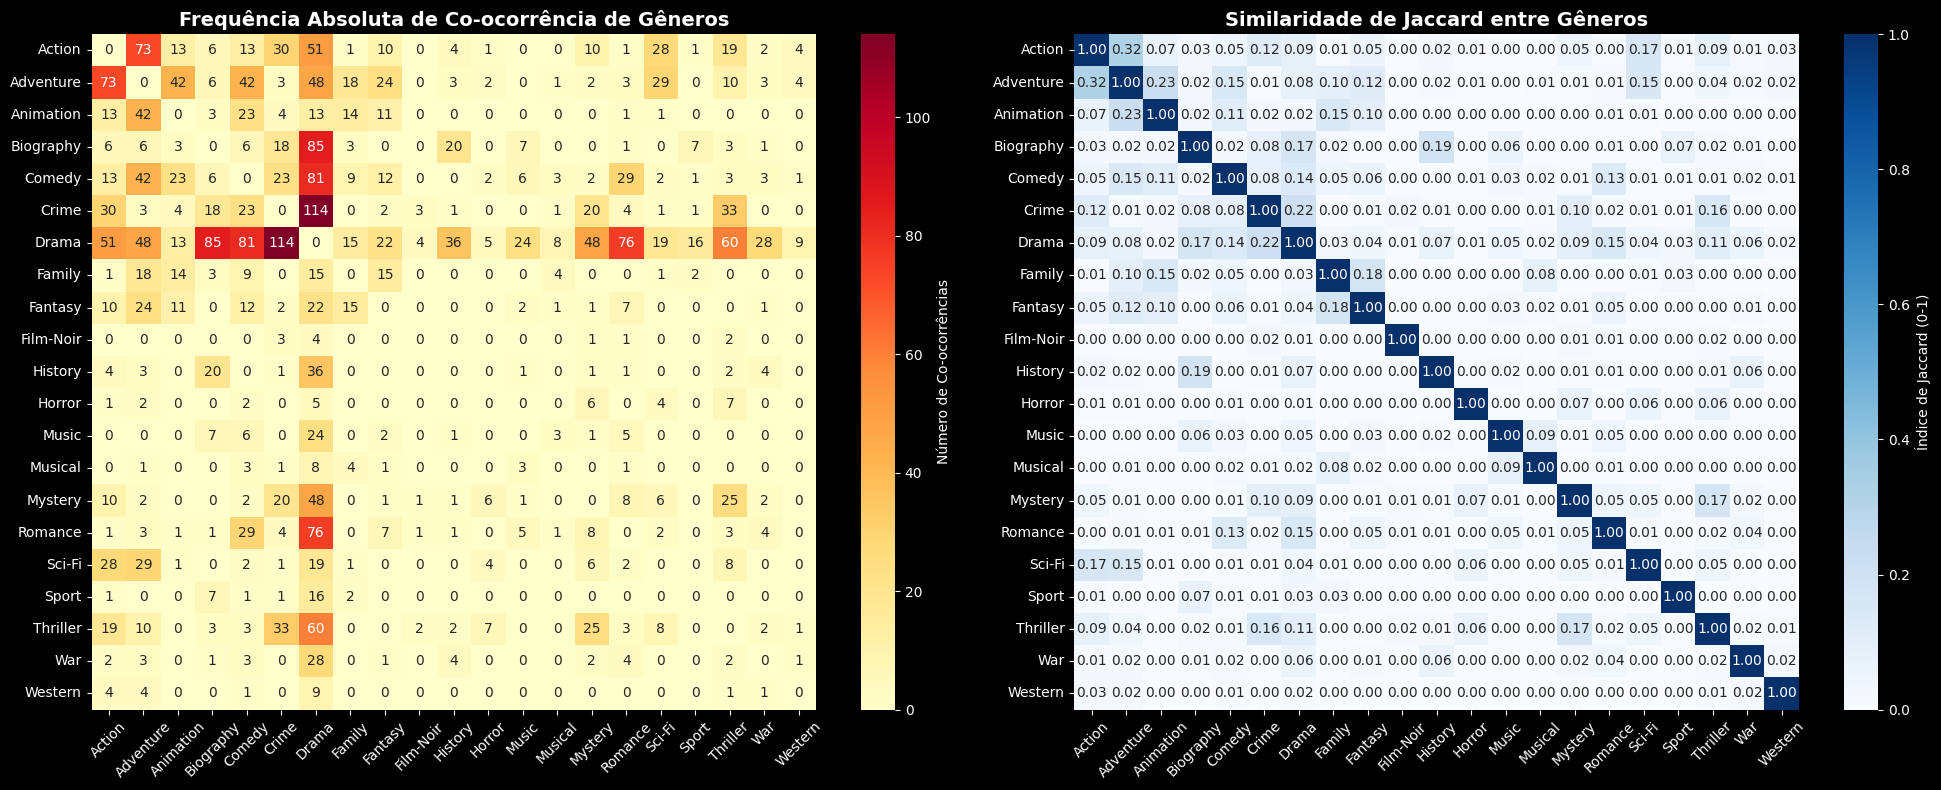

In [19]:
plt.style.use('dark_background')
sns.set_palette("viridis")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap 1: Co-ocorrência Absoluta
sns.heatmap(co_ocorrencia_matriz, 
            annot=True, fmt='d', 
            cmap='YlOrRd', 
            ax=ax1,
            cbar_kws={'label': 'Número de Co-ocorrências'})
ax1.set_title('Frequência Absoluta de Co-ocorrência de Gêneros', 
              fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)

# Heatmap 2: Similaridade de Jaccard
sns.heatmap(jaccard_matriz, 
            annot=True, fmt='.2f', 
            cmap='Blues', 
            ax=ax2,
            cbar_kws={'label': 'Índice de Jaccard (0-1)'})
ax2.set_title('Similaridade de Jaccard entre Gêneros', 
              fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.savefig('../outputs/co_occurrence_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

#### Análise de Performance por Combinação de Gêneros

In [20]:
# Combinando dados
df_combined = pd.concat([df_genre, df[['Gross', 'IMDB_Rating']]], axis=1)

# Encontrando combinações mais comuns de gêneros
from collections import Counter, defaultdict

genre_combinations = []
for idx, row in df_genre.iterrows():
    active_genres = [col for col in df_genre.columns if row[col] == 1]
    if len(active_genres) >= 2:  # So combinações com 2+ gêneros
        genre_combinations.append(tuple(sorted(active_genres)))

# Analisando as 15 combinações mais frequentes
top_combinations = Counter(genre_combinations).most_common(15)

performance_data = []
for combo, count in top_combinations:
    mask = pd.Series([True] * len(df_combined))
    for genre in combo:
        mask = mask & (df_combined[genre] == 1)
    
    # Calculando métricas
    avg_gross = df_combined.loc[mask, 'Gross'].mean()
    avg_rating = df_combined.loc[mask, 'IMDB_Rating'].mean()
    n_movies = mask.sum()
    
    performance_data.append({
        'Combinação': ' + '.join(combo),
        'Número de Filmes': n_movies,
        'Faturamento Médio': avg_gross,
        'Rating Médio': avg_rating
    })

df_performance = pd.DataFrame(performance_data)
df_performance.round(2)

,Combinação,Número de Filmes,Faturamento Médio,Rating Médio
0,Drama + Romance,52,5.583707e+07,8.02
1,Comedy + Drama,48,3.589739e+07,8.02
2,Crime + Drama + Thriller,13,7.232465e+07,8.14
3,Action + Adventure + Sci-Fi,15,3.405858e+08,8.03
4,Biography + Drama + History,15,7.290293e+07,8.07
5,Adventure + Animation + Comedy,15,2.461862e+08,8.01
6,Crime + Drama,76,5.516977e+07,8.12
7,Comedy + Drama + Romance,8,3.988086e+07,8.11
8,Action + Crime + Drama,6,1.347520e+08,8.23
9,Crime + Drama + Mystery,11,4.614866e+07,7.98


#### Visualização da Performance com Gráfico de Barras e Gráfico de Bolhas

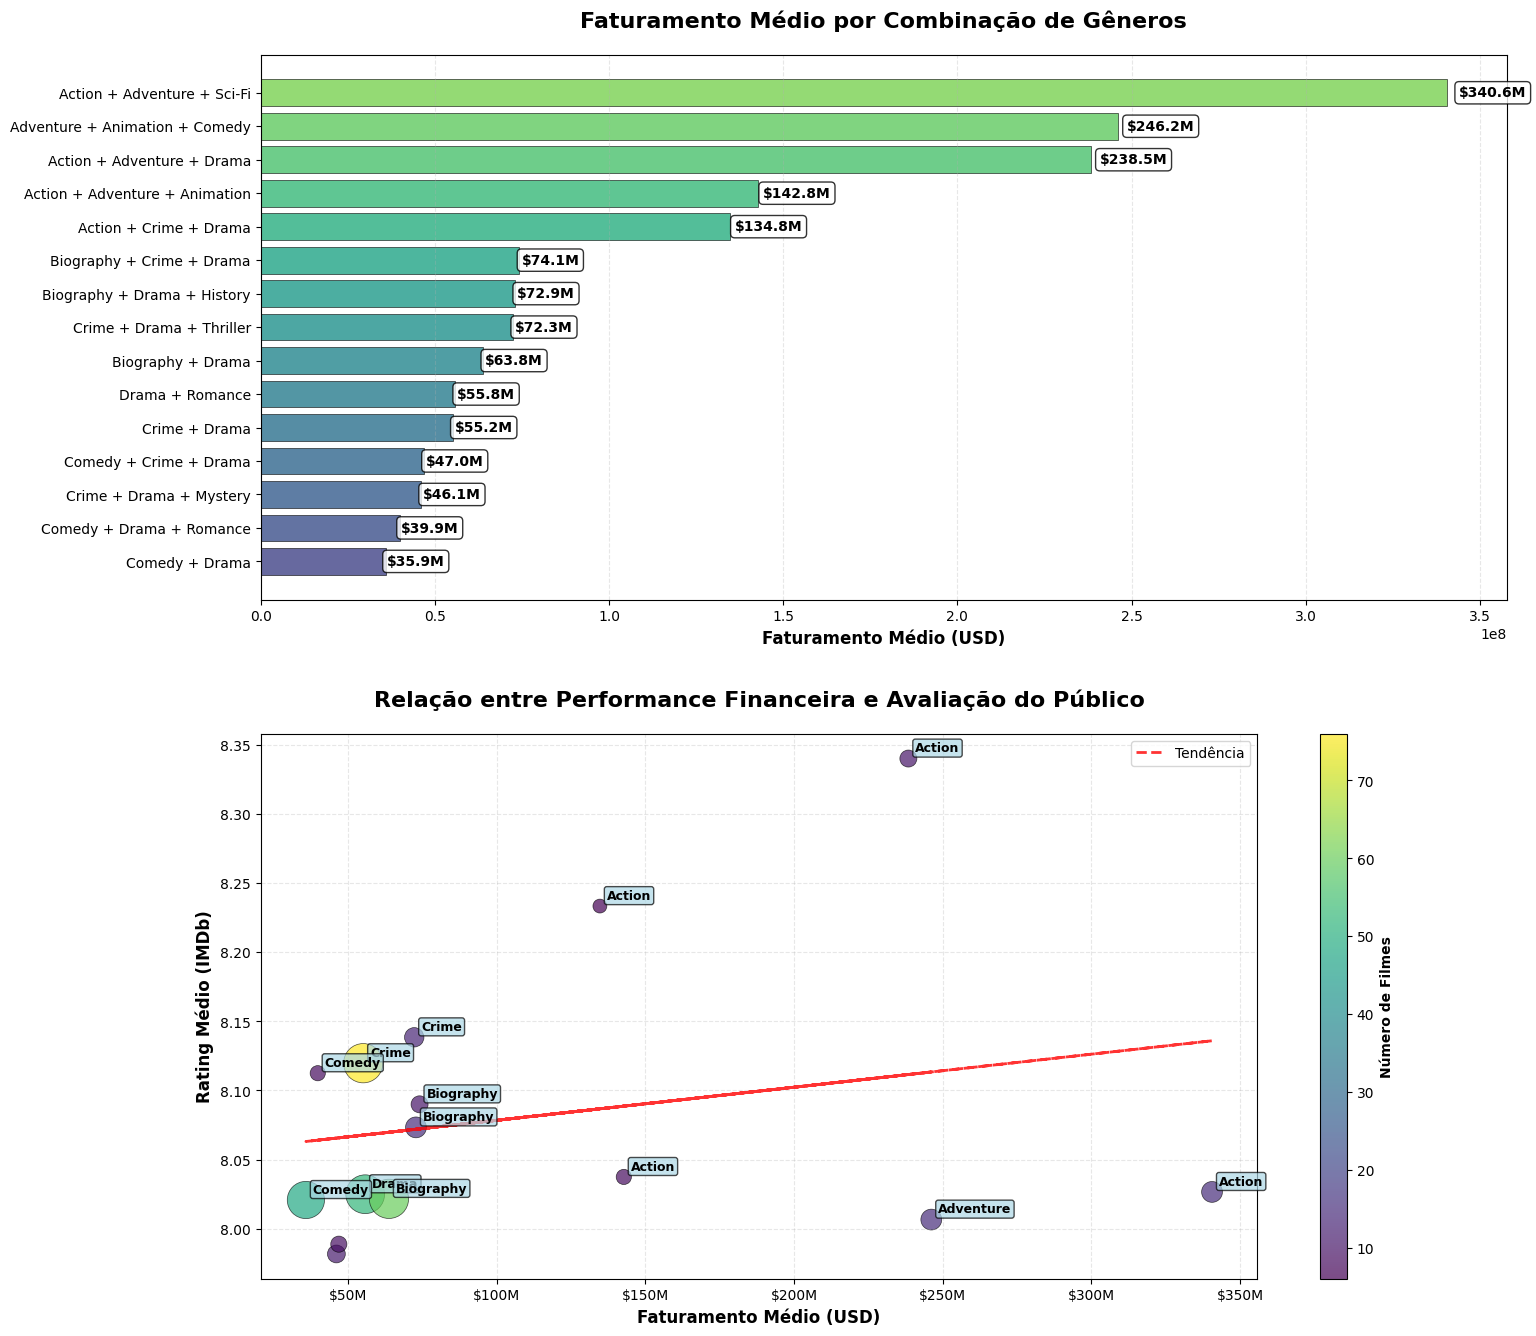

In [21]:
# Configurações de visualização
plt.style.use('default')
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14))

# GRÁFICO 1: FATURAMENTO POR COMBINAÇÃO
# ordenando por faturamento para melhor visualização
df_sorted = df_performance.sort_values('Faturamento Médio', ascending=True)

# Função pra formatar números para melhor legibilidade
def format_money(value):
    if value >= 1_000_000_000:
        return f'${value/1_000_000_000:.1f}B'
    elif value >= 1_000_000:
        return f'${value/1_000_000:.1f}M'
    else:
        return f'${value:,.0f}'

# Criando gráfico de barras horizontais
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(df_sorted)))
bars = ax1.barh(df_sorted['Combinação'], 
                df_sorted['Faturamento Médio'],
                color=colors,
                alpha=0.8,
                edgecolor='black',
                linewidth=0.5)

ax1.set_xlabel('Faturamento Médio (USD)', fontsize=12, fontweight='bold')
ax1.set_title('Faturamento Médio por Combinação de Gêneros', 
              fontsize=16, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Usando função feita pra formatar valores
for i, bar in enumerate(bars):
    width = bar.get_width()
    value_text = format_money(width)
    ax1.text(width * 1.01, bar.get_y() + bar.get_height()/2,
             value_text, 
             ha='left', 
             va='center', 
             fontsize=10,
             fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# GRÁFICO 2: RELAÇÃO FATURAMENTO vs RATING
# Ajustando o tamanho das bolhas para melhor visualização
bubble_sizes = np.clip(df_performance['Número de Filmes'] * 15, 100, 800)

scatter = ax2.scatter(df_performance['Faturamento Médio'], 
                     df_performance['Rating Médio'],
                     s=bubble_sizes,
                     alpha=0.7,
                     c=df_performance['Número de Filmes'],
                     cmap='viridis',
                     edgecolors='black',
                     linewidth=0.5)

# Adicionando anotações para as combinações mais importantes
for i, row in df_performance.iterrows():
    if row['Faturamento Médio'] > 500_000_000 or row['Rating Médio'] > 8.0:
        ax2.annotate(row['Combinação'].split(' + ')[0], 
                    (row['Faturamento Médio'], row['Rating Médio']),
                    xytext=(5, 5), 
                    textcoords='offset points',
                    fontsize=9,
                    fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.7))

# Linha de tendência
z = np.polyfit(df_performance['Faturamento Médio'], 
               df_performance['Rating Médio'], 1)
p = np.poly1d(z)
ax2.plot(df_performance['Faturamento Médio'], 
        p(df_performance['Faturamento Médio']), 
        "r--", 
        alpha=0.8,
        linewidth=2,
        label='Tendência')

ax2.set_xlabel('Faturamento Médio (USD)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Rating Médio (IMDb)', fontsize=12, fontweight='bold')
ax2.set_title('Relação entre Performance Financeira e Avaliação do Público', 
              fontsize=16, fontweight='bold', pad=20)
ax2.grid(alpha=0.3, linestyle='--')
ax2.legend()

# Formatando eixo x para mostrar valores em milhões/bilhões
def format_xaxis(x, pos):
    if x >= 1_000_000_000:
        return f'${x/1_000_000_000:.0f}B'
    elif x >= 1_000_000:
        return f'${x/1_000_000:.0f}M'
    else:
        return f'${x:,.0f}'

ax2.xaxis.set_major_formatter(plt.FuncFormatter(format_xaxis))

# Adicionando colorbar para o tamanho das bolhas
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Número de Filmes', fontsize=10, fontweight='bold')

plt.tight_layout(pad=3.0)

plt.savefig('../outputs/genre_performance_analysis_improved.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white')
plt.show()

##### Identificando Nichos Promissores

In [22]:
# Métricas de potencial
df_performance['Eficiência'] = df_performance['Faturamento Médio'] / df_performance['Número de Filmes']
df_performance['Potencial'] = df_performance['Rating Médio'] * df_performance['Eficiência']

# Os 5 nichos mais promissores
top_niches = df_performance.nlargest(5, 'Potencial')

for _, row in top_niches.iterrows():
    print(f"{row['Combinação']}")
    print(f"Filmes: {row['Número de Filmes']}")
    print(f"Faturamento Médio: ${row['Faturamento Médio']:,.0f}")
    print(f"Rating: {row['Rating Médio']:.1f}")
    print(f"Potencial: {row['Potencial']:.2f}")
    print("-" * 60)

Action + Adventure + Drama
Filmes: 10
Faturamento Médio: $238,478,418
Rating: 8.3
Potencial: 198891000.70
------------------------------------------------------------
Action + Crime + Drama
Filmes: 6
Faturamento Médio: $134,752,034
Rating: 8.2
Potencial: 184909736.00
------------------------------------------------------------
Action + Adventure + Sci-Fi
Filmes: 15
Faturamento Médio: $340,585,838
Rating: 8.0
Potencial: 182251266.09
------------------------------------------------------------
Action + Adventure + Animation
Filmes: 8
Faturamento Médio: $142,794,011
Rating: 8.0
Potencial: 143463357.68
------------------------------------------------------------
Adventure + Animation + Comedy
Filmes: 15
Faturamento Médio: $246,186,197
Rating: 8.0
Potencial: 131408721.30
------------------------------------------------------------


##### Salvando Resultados Importantes

In [91]:
df_performance.to_excel('../outputs/genre_combination_analysis.xlsx', index=False)
top_niches.to_excel('../outputs/promising_niches.xlsx', index=False)
co_ocorrencia_matriz.to_excel('../outputs/co_occurrence_matrix.xlsx')
jaccard_matriz.to_excel('../outputs/jaccard_matrix.xlsx')

#### Insights Importantes

In [24]:
correlation_analysis = []
for genre in df_genre.columns:
    genre_mask = df_genre[genre] == 1
    avg_gross = df.loc[genre_mask, 'Gross'].mean()
    avg_rating = df.loc[genre_mask, 'IMDB_Rating'].mean()
    count = genre_mask.sum()
    
    correlation_analysis.append({
        'Gênero': genre,
        'Número de Filmes': count,
        'Faturamento Médio': avg_gross,
        'Rating Médio': avg_rating
    })

correlation_df = pd.DataFrame(correlation_analysis)
print("Performance Individual por Gênero:")
print(correlation_df.sort_values('Faturamento Médio', ascending=False).round(2))

Performance Individual por Gênero:
       Gênero  Número de Filmes  Faturamento Médio  Rating Médio
1   Adventure               162       1.718806e+08          7.97
16     Sci-Fi                56       1.611225e+08          7.99
0      Action               140       1.566213e+08          7.94
2   Animation                63       1.359713e+08          7.93
8     Fantasy                55       1.105749e+08          7.90
7      Family                43       1.034671e+08          7.88
4      Comedy               161       7.521764e+07          7.87
18   Thriller                99       6.494065e+07          7.92
3   Biography                88       5.984272e+07          7.91
17      Sport                17       5.978584e+07          7.92
10    History                37       5.917046e+07          7.92
6       Drama               498       5.406902e+07          7.94
20    Western                16       5.351884e+07          8.04
14    Mystery                70       4.894937e+07     

### Preparação das Variáveis para Modelagem

In [93]:
# Variáveis numéricas
X_numerical = df[['Meta_score', 'No_of_Votes', 'Released_Year', 'Runtime /min']].copy()

# Variáveis de gênero
X_genre = df_genre.copy()
# Variáveis de texto (TF-IDF)
X_text = df_tfidf_overview.copy()

y = df['IMDB_Rating']

X = pd.concat([X_numerical, X_genre, X_text], axis=1)

X.shape, y.shape

((712, 45), (712,))

In [94]:
X.head(5)

,Meta_score,No_of_Votes,Released_Year,Runtime /min,Action,Adventure,Animation,Biography,Comedy,Crime,...,old,son,story,war,wife,woman,world,year,years,young
0,100.0,1620367,1972,175,0,0,0,0,0,1,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,84.0,2303232,2008,152,1,0,0,0,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90.0,1129952,1974,202,0,0,0,0,0,1,...,0.0,0.569629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,96.0,689845,1957,96,0,0,0,0,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,94.0,1642758,2003,201,1,1,0,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [97]:
y.head(5)

0    9.2
1    9.0
2    9.0
3    9.0
4    8.9
Name: IMDB_Rating, dtype: float64

##### Divisão dos dados em treino e teste

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((569, 45), (143, 45), (569,), (143,))

#### Treinamento dos Modelos

In [105]:
# Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Previsões
y_pred_lr = lr_model.predict(X_test)

# Métricas
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"MAE: {mae_lr:.4f}")
print(f"R²: {r2_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"RMSE: {np.sqrt(mse_lr):.4f}")

MAE: 0.1569
R²: 0.5130
MSE: 0.0408
RMSE: 0.2020


In [106]:
# Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)

# Métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.4f}")
print(f"R²: {r2_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {np.sqrt(mse_rf):.4f}")

MAE: 0.1549
R²: 0.5442
MSE: 0.0382
RMSE: 0.1954


In [107]:
# Célula 6 - Validação Cruzada
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Scores R² da validação cruzada: {cv_scores}")
print(f"R² médio: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Scores R² da validação cruzada: [ -4.24547213 -18.02940262  -2.61476772 -10.00461971 -39.43127269]
R² médio: -14.8651 (+/- 26.8325)


#### Análise da Importância das Features

          feature  importance
1     No_of_Votes    0.551792
2   Released_Year    0.136024
0      Meta_score    0.117279
3    Runtime /min    0.047994
36            son    0.016386
27         family    0.009059
42           year    0.007462
32           love    0.006746
16          Music    0.006322
41          world    0.006122
4          Action    0.005282
22       Thriller    0.005216
9           Crime    0.005142
10          Drama    0.004528
30           help    0.004384
43          years    0.003860
26            boy    0.003858
20         Sci-Fi    0.003788
44          young    0.003364
25       american    0.003361


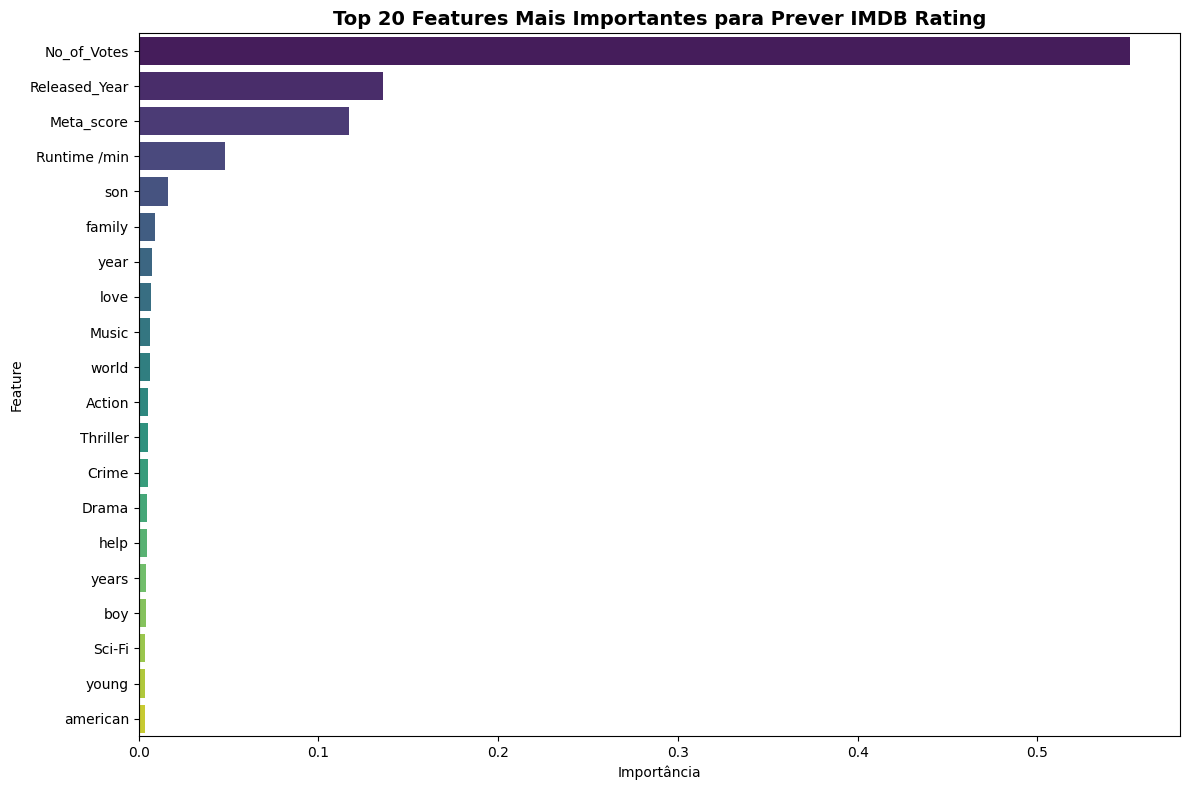

In [112]:
# Importância das Features (Random Forest)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# 20 features mais importantes
top_features = feature_importance.head(20)
print(top_features)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_features, 
            hue='feature', palette='viridis', legend=False)
plt.title('Top 20 Features Mais Importantes para Prever IMDB Rating')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('../outputs/FeatureImportance.png', dpi=300, bbox_inches='tight')
plt.show()

## Previsão para "The Shawshank Redemption"

In [115]:
shawshank_data = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': 1994,
    'Certificate': 'A',
    'Genre': ['Drama'],  # Já como lista
    'IMDB_Rating': np.nan,  # Será previsto pelo modelo
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': 28341469,  # Já como número (sem vírgulas)
    'Runtime /min': 142  # Já no formato correto
}

# Convertendo para DataFrame
shawshank_df = pd.DataFrame([shawshank_data])

shawshank_df

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime /min
0,The Shawshank Redemption,1994,A,[Drama],NaN,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,142


In [124]:
# Genre: Aplicando o mesmo MultiLabelBinarize
shawshank_genre = mlb.transform([['Drama']])  # Usando o mlb já treinado
shawshank_genre_df = pd.DataFrame(shawshank_genre, columns=mlb.classes_)

# Overview: aplicando o mesmo TF-IDF
shawshank_overview_tfidf = tfidf.transform(shawshank_df['Overview'])
shawshank_overview_df = pd.DataFrame(
    shawshank_overview_tfidf.toarray(), 
    columns=tfidf.get_feature_names_out()
)

# Variáveis numéricas
shawshank_numerical = shawshank_df[['Meta_score', 'No_of_Votes', 'Released_Year']].copy()
shawshank_numerical['Runtime /min'] = shawshank_df['Runtime /min']

# Combinando todas as features
X_shawshank = pd.concat([
    shawshank_numerical.reset_index(drop=True),
    shawshank_genre_df.reset_index(drop=True),
    shawshank_overview_df.reset_index(drop=True)
], axis=1)

X_shawshank

,Meta_score,No_of_Votes,Released_Year,Runtime /min,Action,Adventure,Animation,Biography,Comedy,Crime,...,old,son,story,war,wife,woman,world,year,years,young
0,80.0,2343110,1994,142,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Realizando previsão da nota IMDB usando o melhor modelo (Random Forest)

In [126]:
shawshank_prediction = rf_model.predict(X_shawshank)

print(f"Nota IMDB Prevista: {shawshank_prediction[0]:.2f}")
print(f"Nota IMDB Real: 9.3")  # Nota real conhecida
print(f"Diferença: {abs(9.3 - shawshank_prediction[0]):.2f}")

Nota IMDB Prevista: 8.82
Nota IMDB Real: 9.3
Diferença: 0.48


### Salvando Modelo em .pkl

In [127]:
# Salvando o modelo Random Forest
with open('../models/imdb_rating_predictor.pkl', 'wb') as file:
    pkl.dump(rf_model, file)

# Salvando o vectorizer e o binarizer
with open('../models/tfidf_vectorizer.pkl', 'wb') as file:
    pkl.dump(tfidf, file)

with open('../models/mlb_binarizer.pkl', 'wb') as file:
    pkl.dump(mlb, file)

### Análise Final dos Resultados

In [132]:
results_df = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'R²': [r2_lr, r2_rf],
    'RMSE': [np.sqrt(mse_lr), np.sqrt(mse_rf)]
})

print(results_df.round(4))

results_df.to_excel('../outputs/ModelComparison.xlsx', index=False)

             Modelo     MAE      R²    RMSE
0  Regressão Linear  0.1569  0.5130  0.2020
1     Random Forest  0.1549  0.5442  0.1954


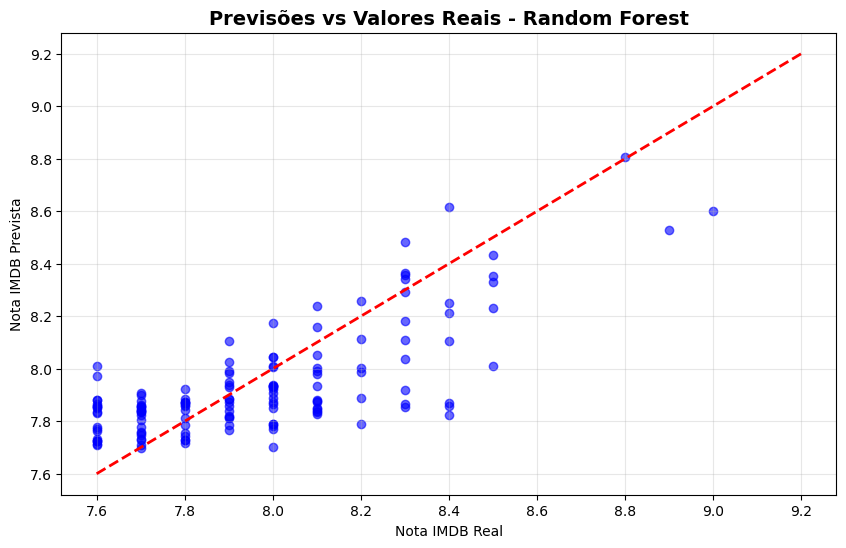

In [133]:
# Previsões vs Valores Reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Nota IMDB Real')
plt.ylabel('Nota IMDB Prevista')
plt.title('Previsões vs Valores Reais - Random Forest')
plt.grid(True, alpha=0.3)
plt.savefig('../outputs/PredictionsVersusActual.png', dpi=300, bbox_inches='tight')
plt.show()